In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine

Engine(sqlite:///Resources/hawaii.sqlite)

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
# Assign the station class to a variable called `Station`
Station = Base.classes.station

# Assign the measurement class to a variable called Measurement`
Measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date_str = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
recent_date_str 

'2017-08-23'

In [10]:
# Design a query to retrieve the last 12 months of precipitation 
recent_date = dt.date.fromisoformat(recent_date_str)
recent_date 

datetime.date(2017, 8, 23)

In [11]:
# Calculate the date one year from the last date in data set.
year_ago_date = recent_date - dt.timedelta(days=365)
year_ago_date

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the date and precipitation scores for the last 12 months
prcp_results = session.query( Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_ago_date).\
    all()  
prcp_results

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_results_df = pd.DataFrame(prcp_results, columns =["date", "prcp"])
prcp_results_df.head() 

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [14]:
# Sort the dataframe by date
sorted_prcp_results_df = prcp_results_df.sort_values("date")
sorted_prcp_results_df.head()

,date,prcp
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15


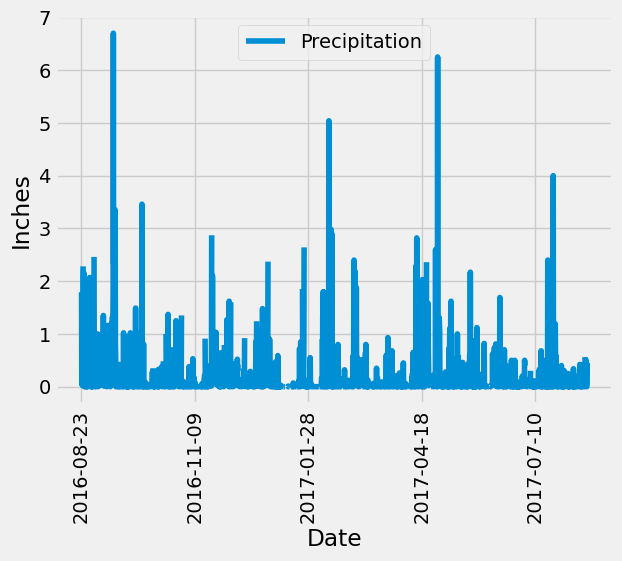

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
# Plot the data
sorted_prcp_results_df.plot(x='date', y='prcp', rot=90)

# Set labels
plt.xlabel('Date')
plt.ylabel('Inches')

# Set legend label
plt.legend(['Precipitation'])


# Save the plot as an image
plt.savefig('precipitation_plot.png')

# Show the plot
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
count = prcp_results_df['prcp'].count()
mean = prcp_results_df['prcp'].mean()
std = prcp_results_df['prcp'].std()
min_val = prcp_results_df['prcp'].min()
q25 = prcp_results_df['prcp'].quantile(0.25)
median = prcp_results_df['prcp'].median()
q75 = prcp_results_df['prcp'].quantile(0.75)
max_val = prcp_results_df['prcp'].max()

# display results 
summary_df = pd.DataFrame({
    'Count': [count],
    'Mean': [mean],
    'Std': [std],
    'Min': [min_val],
    '25%': [q25],
    '50%': [median],
    '75%': [q75],
    'Max': [max_val]
})

summary_df = summary_df.transpose()
summary_df = summary_df.rename(columns={0 : 'Precipitation'})
summary_df

,Precipitation
Count,2021.000000
Mean,0.177279
Std,0.461190
Min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
Max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session = Session(engine)
stations = session.query(Station).all()
total_stations = session.query(Station).count()
print("Total number of stations:", total_stations)

Total number of stations: 9


In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
session = Session(engine)
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()

# List the stations and their counts in descending order.
print("[")
for station, count in active_stations:
    print(f"  ('{station}', {count}),")
print("]")

[
  ('USC00519281', 2772),
  ('USC00519397', 2724),
  ('USC00513117', 2709),
  ('USC00519523', 2669),
  ('USC00516128', 2612),
  ('USC00514830', 2202),
  ('USC00511918', 1979),
  ('USC00517948', 1372),
  ('USC00518838', 511),
]


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
# Get the most active station ID
most_active_station_id = active_stations[0][0]

# Query the lowest, highest, and average temperature for the most active station
temperatures = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == most_active_station_id).all()

# Print the results
lowest_temp, highest_temp, avg_temp = temperatures[0]
print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp}")

Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


Most Active Station ID: USC00519281


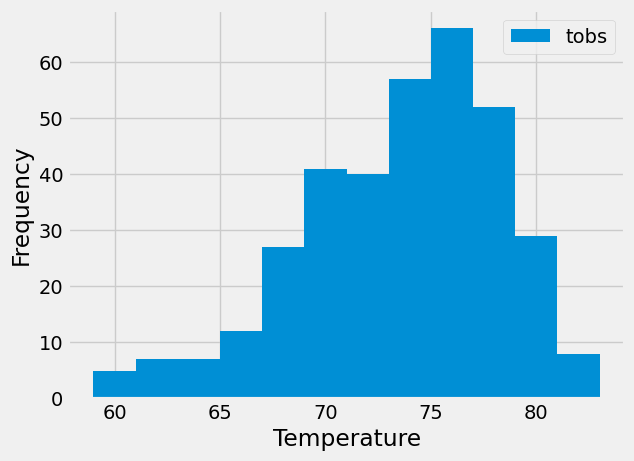

In [20]:
# Using the most active station id
most_active_station_id = active_stations[0][0]

print("Most Active Station ID:", most_active_station_id)

# Calculate the date 12 months ago from the last date in the dataset
last_date = session.query(func.max(Measurement.date)).scalar()
last_date = datetime.strptime(last_date, '%Y-%m-%d')
one_year_ago = last_date - timedelta(days=365)


# Query the last 12 months of temperature observation data for this station 
temperature_data = session.query(Measurement.tobs).\
                    filter(Measurement.station == most_active_station_id).\
                    filter(Measurement.date >= one_year_ago).all()

# Get the temperature results 
temperatures = [temp[0] for temp in temperature_data]

# Plot the results as a histogram
plt.hist(temperatures, bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()

# Save the image
plt.savefig('temperature_histogram.png')

# Show the plot
plt.show() 

# Close Session

In [21]:
# Close Session
session.close()